In [49]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# path of CSV file
file_path = 'merged_df_30.csv'

# reading CSV file
data = pd.read_csv(file_path)

In [51]:
print("Imported data:")
print(data)

Imported data:
                        time    blr_mod_lvl      blr_t  heat  flame  water  \
0        2022-10-01 00:00:00   0.000000e+00  28.398440   0.0    0.0    0.0   
1        2022-10-01 00:01:00   0.000000e+00  28.398440   0.0    0.0    0.0   
2        2022-10-01 00:02:00   0.000000e+00  28.413088   0.0    0.0    0.0   
3        2022-10-01 00:03:00   0.000000e+00  28.479815   0.0    0.0    0.0   
4        2022-10-01 00:04:00   0.000000e+00  28.496090   0.0    0.0    0.0   
...                      ...            ...        ...   ...    ...    ...   
7331983  2023-04-30 23:55:00  2.871866e-119  20.000000   0.0    0.0    0.0   
7331984  2023-04-30 23:56:00  1.914578e-119  20.000000   0.0    0.0    0.0   
7331985  2023-04-30 23:57:00  1.276385e-119  20.000000   0.0    0.0    0.0   
7331986  2023-04-30 23:58:00  8.509234e-120  20.000000   0.0    0.0    0.0   
7331987  2023-04-30 23:59:00  5.672823e-120  20.000000   0.0    0.0    0.0   

             t_out      t_ret   t_r  t_r_set  ot

In [52]:
# functions for plotting data
def plot_one(category, category_name):
    plt.plot(category)
    plt.title("Plot of " + category_name)
    plt.ylabel(category_name)
    plt.show

def plot_dataset(dataset, column_names):
    for column in column_names:
        plt.plot(dataset[column])
        plt.title("Plot of "+ column)
        plt.ylabel(column)
        #plt.grid(True)
        plt.show()

In [53]:
# functions for calculating correlation between categories
def corr_one(dataset, column, corr_categories):
    corr = {}
    for category in corr_categories:
        corr[category] = dataset[column].corr(dataset[category])
    return corr

def corr_list(dataset, corr_list, corr_categories):
    corr = {}
    for category in corr_list:
        corr[category] = {}
        corr[category] = corr_one(dataset, category, corr_categories)
    return corr

In [54]:
# returns only categories with significant correlation
def significant_pairs(correlation, corr_list, corr_columns):
    pairs = []
    for col1 in corr_list:
        for col2 in corr_columns:
            if col1 != col2 :
                if correlation[col1][col2] > 0.5 or correlation[col1][col2] < -0.5:
                    pairs.append([col1, col2, correlation[col1][col2]])
    
    print("Significant pairs of correlation:")
    for item in pairs:
        print(item)

In [55]:
# calculate and print correlation and significant pairs
def calc_correlation(dataset, primary_col, sec_col):
    correlation = {}
    correlation = corr_list(dataset, primary_col, sec_col)
    
    print("2x2 Correlation Table:")
    print(pd.DataFrame(correlation))

    print("\n")
    significant_pairs(correlation, primary_col, sec_col)

In [56]:
# list of all column names
column_names = data.columns.tolist()

print("List of column names:")
print(column_names)

corr_columns = column_names.copy()
corr_columns.remove('time')
corr_columns.remove('house_id')
corr_columns.remove('nodata')

# list of column names for correlation
print("List of column names for correlation:")
print(corr_columns)

plot_columns = corr_columns.copy()
plot_columns.remove("month")
plot_columns.remove("day")
plot_columns.remove("hour")

# list of column names for plotting
print("List of column names for plotting:")
print(plot_columns)

List of column names:
['time', 'blr_mod_lvl', 'blr_t', 'heat', 'flame', 'water', 't_out', 't_ret', 't_r', 't_r_set', 'otc_cur', 't_set', 'otc_maxt', 'bypass', 'nodata', 'house_id', 'month', 'day', 'hour']
List of column names for correlation:
['blr_mod_lvl', 'blr_t', 'heat', 'flame', 'water', 't_out', 't_ret', 't_r', 't_r_set', 'otc_cur', 't_set', 'otc_maxt', 'bypass', 'month', 'day', 'hour']
List of column names for plotting:
['blr_mod_lvl', 'blr_t', 'heat', 'flame', 'water', 't_out', 't_ret', 't_r', 't_r_set', 'otc_cur', 't_set', 'otc_maxt', 'bypass']


In [57]:
#plot_dataset(data, plot_columns)

In [58]:
correlation = corr_list(data, corr_columns, corr_columns)

In [59]:
# print table of correlation
print("2x2 Correlation Table:")
print(pd.DataFrame(correlation))

2x2 Correlation Table:
             blr_mod_lvl     blr_t      heat     flame     water     t_out  \
blr_mod_lvl     1.000000  0.412116  0.666179  0.626286 -0.040739 -0.146729   
blr_t           0.412116  1.000000  0.478297  0.534671  0.225927 -0.046090   
heat            0.666179  0.478297  1.000000  0.825689 -0.053550 -0.135756   
flame           0.626286  0.534671  0.825689  1.000000  0.359891 -0.126174   
water          -0.040739  0.225927 -0.053550  0.359891  1.000000  0.003054   
t_out          -0.146729 -0.046090 -0.135756 -0.126174  0.003054  1.000000   
t_ret           0.233408  0.887070  0.315878  0.353537  0.175999  0.003400   
t_r            -0.035513  0.129891 -0.032902 -0.023413  0.015247  0.317473   
t_r_set         0.152304  0.325832  0.210807  0.196278  0.040088 -0.128461   
otc_cur         0.071167  0.025701 -0.015678  0.007944  0.010442 -0.168370   
t_set           0.682319  0.530195  0.900835  0.810210  0.042920 -0.158118   
otc_maxt        0.160899  0.051921  0.110

In [60]:
#pairs = significant_pairs(correlation, corr_columns, corr_columns)

In [61]:
calc_correlation(data, corr_columns, corr_columns)

2x2 Correlation Table:
             blr_mod_lvl     blr_t      heat     flame     water     t_out  \
blr_mod_lvl     1.000000  0.412116  0.666179  0.626286 -0.040739 -0.146729   
blr_t           0.412116  1.000000  0.478297  0.534671  0.225927 -0.046090   
heat            0.666179  0.478297  1.000000  0.825689 -0.053550 -0.135756   
flame           0.626286  0.534671  0.825689  1.000000  0.359891 -0.126174   
water          -0.040739  0.225927 -0.053550  0.359891  1.000000  0.003054   
t_out          -0.146729 -0.046090 -0.135756 -0.126174  0.003054  1.000000   
t_ret           0.233408  0.887070  0.315878  0.353537  0.175999  0.003400   
t_r            -0.035513  0.129891 -0.032902 -0.023413  0.015247  0.317473   
t_r_set         0.152304  0.325832  0.210807  0.196278  0.040088 -0.128461   
otc_cur         0.071167  0.025701 -0.015678  0.007944  0.010442 -0.168370   
t_set           0.682319  0.530195  0.900835  0.810210  0.042920 -0.158118   
otc_maxt        0.160899  0.051921  0.110

In [62]:
# break dataset into sub datasets

size = 10000000
#size = 1000

# total number of rows in the dataset
total_rows = len(data)

# number of sub datasets needed
num_sub_datasets = total_rows // size

# list to store sub datasets
sub_datasets = []

# create sub datasets
for i in range(num_sub_datasets):
    start_index = i * size
    end_index = (i + 1) * size
    sub_data = data.iloc[start_index:end_index]
    sub_datasets.append(sub_data)

# if there are remaining rows, create one more sub dataset
if total_rows % size != 0:
    remaining_data = data.iloc[num_sub_datasets * size:]
    sub_datasets.append(remaining_data)

# number of sub datasets created
print("Number of sub datasets:", len(sub_datasets))

Number of sub datasets: 1


C:\Users\gekal\AppData\Local\Temp\ipykernel_2352\1585190488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['boiler_water_efficiency'] = dataset['blr_t'] - dataset['t_ret']
C:\Users\gekal\AppData\Local\Temp\ipykernel_2352\1585190488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['boiler_t_target'] = dataset['t_set'] - dataset['blr_t']
C:\Users\gekal\AppData\Local\Temp\ipykernel_2352\1585190488.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

                        time    blr_mod_lvl      blr_t  heat  flame  water  \
0        2022-10-01 00:00:00   0.000000e+00  28.398440   0.0    0.0    0.0   
1        2022-10-01 00:01:00   0.000000e+00  28.398440   0.0    0.0    0.0   
2        2022-10-01 00:02:00   0.000000e+00  28.413088   0.0    0.0    0.0   
3        2022-10-01 00:03:00   0.000000e+00  28.479815   0.0    0.0    0.0   
4        2022-10-01 00:04:00   0.000000e+00  28.496090   0.0    0.0    0.0   
...                      ...            ...        ...   ...    ...    ...   
7331983  2023-04-30 23:55:00  2.871866e-119  20.000000   0.0    0.0    0.0   
7331984  2023-04-30 23:56:00  1.914578e-119  20.000000   0.0    0.0    0.0   
7331985  2023-04-30 23:57:00  1.276385e-119  20.000000   0.0    0.0    0.0   
7331986  2023-04-30 23:58:00  8.509234e-120  20.000000   0.0    0.0    0.0   
7331987  2023-04-30 23:59:00  5.672823e-120  20.000000   0.0    0.0    0.0   

             t_out      t_ret   t_r  t_r_set  ...  house_id  mo

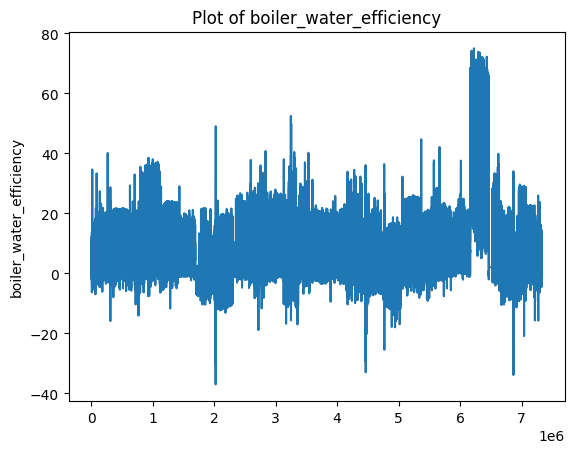

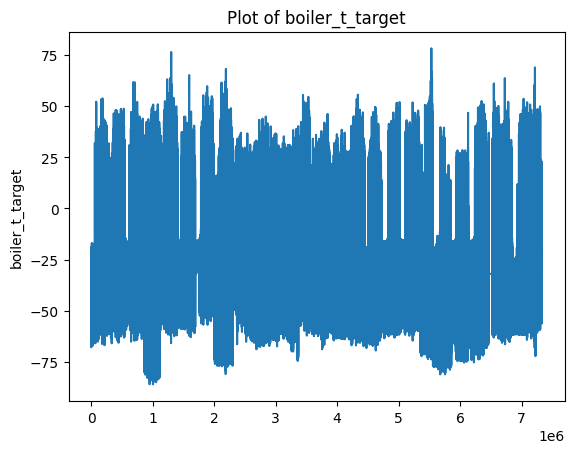

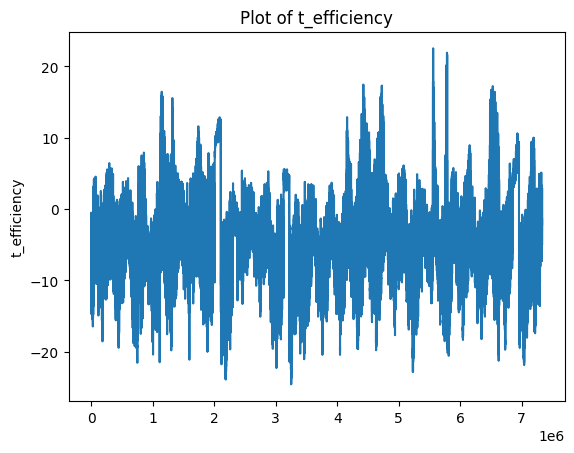

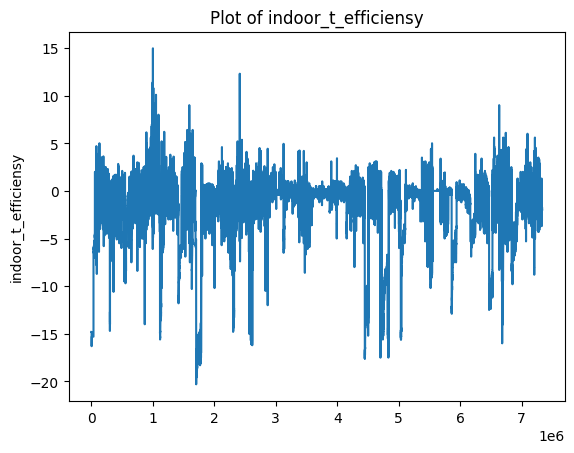

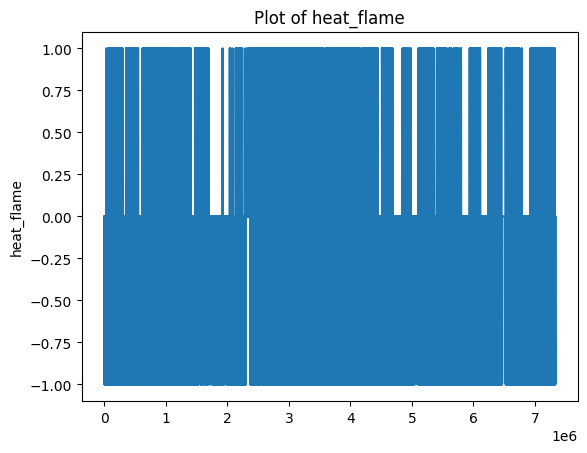

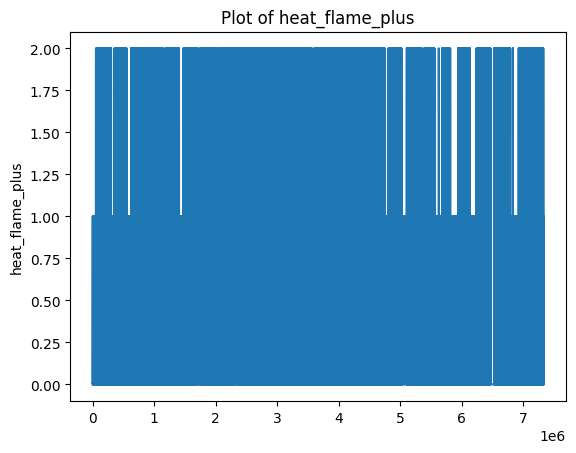

In [63]:
# create some categories to find if they are representative of the data

i = 0
dataset = sub_datasets[i]

dataset['boiler_water_efficiency'] = dataset['blr_t'] - dataset['t_ret']
dataset['boiler_t_target'] = dataset['t_set'] - dataset['blr_t']
dataset['t_efficiency'] = dataset['t_out'] - dataset['t_r']
dataset['indoor_t_efficiensy'] = dataset['t_r_set'] - dataset['t_r']
dataset['heat_flame'] = dataset['heat'] - dataset['flame']
dataset['heat_flame_plus'] = dataset['heat'] + dataset['flame']

print(dataset)
all_col_names = data.columns.tolist()
col_names = ['boiler_water_efficiency', 'boiler_t_target', 't_efficiency', 'indoor_t_efficiensy', 'heat_flame', 'heat_flame_plus']

all_corr_columns = all_col_names.copy()
all_corr_columns.remove('time')
all_corr_columns.remove('house_id')
all_corr_columns.remove('nodata')
print("\n")
print("List of column names for correlation:")
print(all_corr_columns)

calc_correlation(dataset, col_names, all_corr_columns)

plot_dataset(dataset, col_names)

In [64]:
nodata_value = 0.0

filtered_nodata = data[data['nodata'] != nodata_value]

print(filtered_nodata)

Empty DataFrame
Columns: [time, blr_mod_lvl, blr_t, heat, flame, water, t_out, t_ret, t_r, t_r_set, otc_cur, t_set, otc_maxt, bypass, nodata, house_id, month, day, hour]
Index: []


In [65]:
# Different houses (house ids) in data
houses = data['house_id'].unique()
print("Different houses in data:")
print(houses)
print("Number of different houses:")
print(len(houses))

Different houses in data:
['home2' 'home9' 'home13' 'home14' 'home34' 'home46' 'home55' 'home67'
 'home86' 'home93' 'home101' 'home106' 'home110' 'home43' 'home63'
 'home53' 'home79' 'home90' 'home95' 'home5' 'home17' 'home47' 'home51'
 'home65' 'home77' 'home89' 'home111' 'home114']
Number of different houses:
28


In [66]:
# Sub-datasets for each house
house_datasets = {}
for house in houses:
    house_datasets[house] = data[data['house_id'] == house]

# Example
#print("House-dataset for house_id 'home34':")
#print(house_datasets["home34"])

In [67]:
# for plotting a category for all houses
def plot_houses_category(dataset, category):
    num_subplots = len(houses)

    subplot_width = 10
    subplot_height = 10
    total_width = num_subplots * subplot_width

    # Create the figure and axes
    fig, axes = plt.subplots(1, num_subplots, figsize=(total_width, subplot_height))

    # Iterate over categories and create subplots
    i=0
    for house in houses:
        # Get the data for the current category from each sub-dataset
        category_data = dataset[house][category]
    
        # Plot the data on the corresponding subplot
        ax = axes[i]
        ax.plot(category_data, label=category)
        ax.set_title(house)
        ax.legend()
        #ax.grid(True)
        i=i+1

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [68]:
#plot_houses_category(house_datasets, "blr_mod_lvl")

In [69]:
#for category in plot_columns:
#    plot_houses_category(house_datasets, category)

In [70]:
for house in houses:
    print("House with id:" + house)
    calc_correlation(house_datasets[house], corr_columns, corr_columns)
    print("\n")

House with id:home2
2x2 Correlation Table:
             blr_mod_lvl     blr_t      heat     flame     water     t_out  \
blr_mod_lvl     1.000000  0.476219  0.681818  0.650326 -0.031328 -0.144008   
blr_t           0.476219  1.000000  0.614532  0.644784  0.259688 -0.082725   
heat            0.681818  0.614532  1.000000  0.780188 -0.042983 -0.186234   
flame           0.650326  0.644784  0.780188  1.000000  0.402609 -0.153221   
water          -0.031328  0.259688 -0.042983  0.402609  1.000000 -0.026253   
t_out          -0.144008 -0.082725 -0.186234 -0.153221 -0.026253  1.000000   
t_ret           0.350485  0.983961  0.530190  0.534210  0.234523 -0.034024   
t_r            -0.068707  0.022746 -0.086244 -0.069217 -0.005478  0.492192   
t_r_set         0.365876  0.566568  0.517380  0.473070  0.108856 -0.380207   
otc_cur         0.081332  0.073590  0.102436  0.089529  0.007703 -0.296857   
t_set           0.676677  0.669401  0.934973  0.829765  0.124571 -0.183546   
otc_maxt        0.183

c:\Users\gekal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\gekal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


2x2 Correlation Table:
             blr_mod_lvl     blr_t      heat     flame     water     t_out  \
blr_mod_lvl     1.000000  0.590275  0.881336  0.790363 -0.028895 -0.156607   
blr_t           0.590275  1.000000  0.534484  0.578956  0.203728  0.064769   
heat            0.881336  0.534484  1.000000  0.895346 -0.029563 -0.151602   
flame           0.790363  0.578956  0.895346  1.000000  0.400764 -0.140905   
water          -0.028895  0.203728 -0.029563  0.400764  1.000000 -0.007071   
t_out          -0.156607  0.064769 -0.151602 -0.140905 -0.007071  1.000000   
t_ret           0.389544  0.963254  0.342898  0.401723  0.195481  0.090727   
t_r            -0.107706  0.111981 -0.109440 -0.098499  0.002111  0.449171   
t_r_set         0.194171  0.337357  0.201481  0.215962  0.072296 -0.459505   
otc_cur         0.137901  0.185805  0.130856  0.137277  0.040970 -0.437374   
t_set           0.819707  0.578252  0.880364  0.821593  0.047564 -0.170844   
otc_maxt        0.168686 -0.038697  0.162

c:\Users\gekal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\gekal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


2x2 Correlation Table:
             blr_mod_lvl     blr_t      heat     flame     water     t_out  \
blr_mod_lvl     1.000000  0.359685  0.534619  0.538860 -0.013409 -0.135856   
blr_t           0.359685  1.000000  0.661190  0.655164  0.155510 -0.101524   
heat            0.534619  0.661190  1.000000  0.882651 -0.023270 -0.172794   
flame           0.538860  0.655164  0.882651  1.000000  0.274144 -0.170466   
water          -0.013409  0.155510 -0.023270  0.274144  1.000000 -0.006722   
t_out          -0.135856 -0.101524 -0.172794 -0.170466 -0.006722  1.000000   
t_ret           0.272279  0.989972  0.622053  0.600486  0.132040 -0.070231   
t_r            -0.065659  0.060470 -0.096424 -0.090389  0.001297  0.704544   
t_r_set         0.048614  0.285756  0.110677  0.092971 -0.008456  0.633309   
otc_cur         0.111548  0.215758  0.173022  0.169421  0.032054 -0.595806   
t_set           0.531778  0.682169  0.978504  0.892402  0.015097 -0.187053   
otc_maxt        0.164151  0.175109  0.210

c:\Users\gekal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\gekal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


2x2 Correlation Table:
             blr_mod_lvl     blr_t      heat     flame     water     t_out  \
blr_mod_lvl     1.000000  0.372420  0.711147  0.618118 -0.024859 -0.128172   
blr_t           0.372420  1.000000  0.369395  0.485774  0.272004  0.058500   
heat            0.711147  0.369395  1.000000  0.773975 -0.030261 -0.142926   
flame           0.618118  0.485774  0.773975  1.000000  0.462830 -0.111527   
water          -0.024859  0.272004 -0.030261  0.462830  1.000000  0.017420   
t_out          -0.128172  0.058500 -0.142926 -0.111527  0.017420  1.000000   
t_ret           0.220586  0.979202  0.243991  0.339639  0.215736  0.077117   
t_r            -0.075507  0.102980 -0.113993 -0.078642  0.024974  0.138712   
t_r_set         0.023542  0.134455  0.034899  0.034610  0.009719  0.262290   
otc_cur              NaN       NaN       NaN       NaN       NaN       NaN   
t_set           0.755757  0.408155  0.959456  0.804203 -0.002275 -0.158611   
otc_maxt        0.128351 -0.058399  0.143

In [71]:
houses_correlation = {}
for house in houses:
    houses_correlation[house] = {}
    houses_correlation[house] = corr_list(house_datasets[house], corr_columns, corr_columns)

c:\Users\gekal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\gekal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [72]:
# they give error in correlation because of the calculation
error_houses = ["home55", "home5", "home17"]

In [73]:
for house in error_houses:
    print("Examining Houses Correlation Table:")
    print("!!! " + house + " !!!")
    print(pd.DataFrame(houses_correlation[house]))
    print("\n")

Examining Houses Correlation Table:
!!! home55 !!!
             blr_mod_lvl     blr_t      heat     flame     water     t_out  \
blr_mod_lvl     1.000000  0.590275  0.881336  0.790363 -0.028895 -0.156607   
blr_t           0.590275  1.000000  0.534484  0.578956  0.203728  0.064769   
heat            0.881336  0.534484  1.000000  0.895346 -0.029563 -0.151602   
flame           0.790363  0.578956  0.895346  1.000000  0.400764 -0.140905   
water          -0.028895  0.203728 -0.029563  0.400764  1.000000 -0.007071   
t_out          -0.156607  0.064769 -0.151602 -0.140905 -0.007071  1.000000   
t_ret           0.389544  0.963254  0.342898  0.401723  0.195481  0.090727   
t_r            -0.107706  0.111981 -0.109440 -0.098499  0.002111  0.449171   
t_r_set         0.194171  0.337357  0.201481  0.215962  0.072296 -0.459505   
otc_cur         0.137901  0.185805  0.130856  0.137277  0.040970 -0.437374   
t_set           0.819707  0.578252  0.880364  0.821593  0.047564 -0.170844   
otc_maxt     

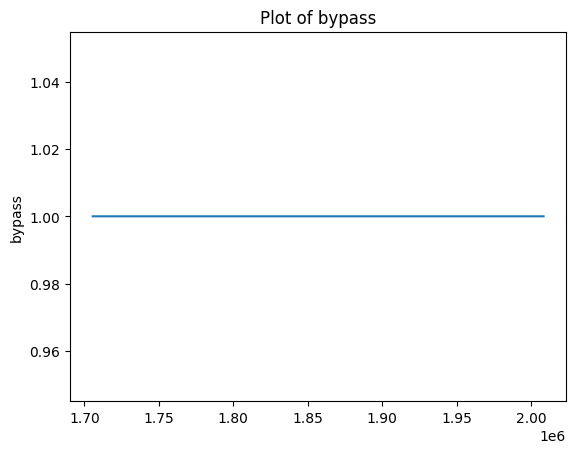

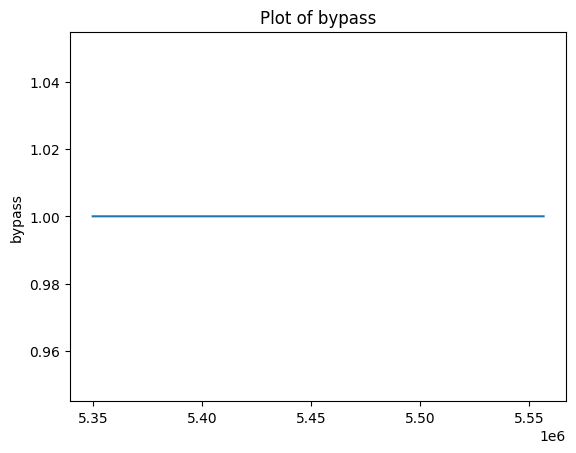

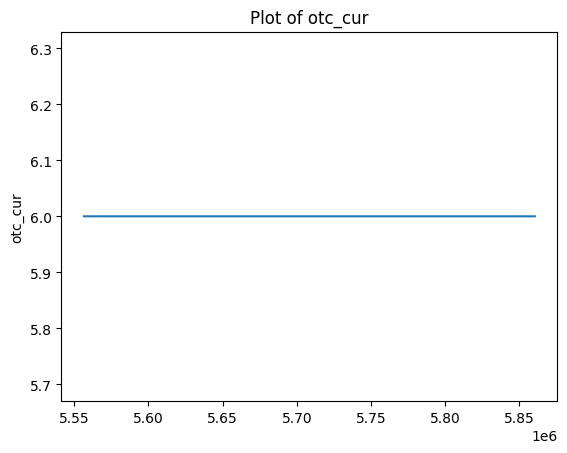

In [74]:
plot_dataset(house_datasets["home55"], ["bypass"])
plot_dataset(house_datasets["home5"], ["bypass"])
plot_dataset(house_datasets["home17"], ["otc_cur"])

In [75]:
avg_houses_correlation = {}
for col1 in corr_columns:
    avg_houses_correlation[col1] = {}
    for col2 in corr_columns:
        sum = 0
        for house in houses:
            sum += houses_correlation[house][col1][col2]
        avg_houses_correlation[col1][col2] = sum / len(houses)

# Print the table
print("2x2 Average Houses Correlation Table:")
print(pd.DataFrame(avg_houses_correlation))

2x2 Average Houses Correlation Table:
             blr_mod_lvl     blr_t      heat     flame     water     t_out  \
blr_mod_lvl     1.000000  0.444404  0.705896  0.644736 -0.040981 -0.158398   
blr_t           0.444404  1.000000  0.488506  0.546611  0.210949 -0.101456   
heat            0.705896  0.488506  1.000000  0.819746 -0.051781 -0.164036   
flame           0.644736  0.546611  0.819746  1.000000  0.359718 -0.149549   
water          -0.040981  0.210949 -0.051781  0.359718  1.000000  0.001123   
t_out          -0.158398 -0.101456 -0.164036 -0.149549  0.001123  1.000000   
t_ret           0.257334  0.918987  0.324193  0.364724  0.163466 -0.057822   
t_r            -0.063184  0.131068 -0.071144 -0.052804  0.011762  0.379287   
t_r_set         0.190692  0.349493  0.256788  0.236574  0.037175 -0.165358   
otc_cur              NaN       NaN       NaN       NaN       NaN       NaN   
t_set           0.711565  0.535501  0.911831  0.807168  0.038793 -0.187011   
otc_maxt        0.177904  

In [76]:
temp_aproved_houses = houses.tolist()
print(temp_aproved_houses)
aproved_houses = temp_aproved_houses.copy()

avg_houses_correlation = {}
for col1 in corr_columns:
    avg_houses_correlation[col1] = {}
    for col2 in corr_columns:
        aproved_houses = temp_aproved_houses.copy()
        if (col1 == "bypass") or (col2 == "bypass") :
            aproved_houses.remove('home55')
            aproved_houses.remove('home5')
        if (col1 == "otc_cur") or (col2 == "otc_cur") :
            aproved_houses.remove('home17')
        sum = 0
        for house in aproved_houses:
            sum += houses_correlation[house][col1][col2]
        avg_houses_correlation[col1][col2] = sum / len(aproved_houses)

# Print the table
print("Average Houses Correlation Table:")
print(pd.DataFrame(avg_houses_correlation))

['home2', 'home9', 'home13', 'home14', 'home34', 'home46', 'home55', 'home67', 'home86', 'home93', 'home101', 'home106', 'home110', 'home43', 'home63', 'home53', 'home79', 'home90', 'home95', 'home5', 'home17', 'home47', 'home51', 'home65', 'home77', 'home89', 'home111', 'home114']
Average Houses Correlation Table:
             blr_mod_lvl     blr_t      heat     flame     water     t_out  \
blr_mod_lvl     1.000000  0.444404  0.705896  0.644736 -0.040981 -0.158398   
blr_t           0.444404  1.000000  0.488506  0.546611  0.210949 -0.101456   
heat            0.705896  0.488506  1.000000  0.819746 -0.051781 -0.164036   
flame           0.644736  0.546611  0.819746  1.000000  0.359718 -0.149549   
water          -0.040981  0.210949 -0.051781  0.359718  1.000000  0.001123   
t_out          -0.158398 -0.101456 -0.164036 -0.149549  0.001123  1.000000   
t_ret           0.257334  0.918987  0.324193  0.364724  0.163466 -0.057822   
t_r            -0.063184  0.131068 -0.071144 -0.052804  0.0

In [77]:
significant_pairs(avg_houses_correlation, corr_columns, corr_columns)

Significant pairs of correlation:
['blr_mod_lvl', 'heat', 0.7058962164257033]
['blr_mod_lvl', 'flame', 0.6447359719209416]
['blr_mod_lvl', 't_set', 0.7115649256969184]
['blr_t', 'flame', 0.5466109554820585]
['blr_t', 't_ret', 0.9189866166684029]
['blr_t', 't_set', 0.5355014718186236]
['heat', 'blr_mod_lvl', 0.7058962164257033]
['heat', 'flame', 0.8197455996880468]
['heat', 't_set', 0.9118312847492261]
['flame', 'blr_mod_lvl', 0.6447359719209416]
['flame', 'blr_t', 0.5466109554820585]
['flame', 'heat', 0.819745599688047]
['flame', 't_set', 0.8071684098115496]
['t_out', 'otc_maxt', -0.9541919265344454]
['t_ret', 'blr_t', 0.9189866166684029]
['t_set', 'blr_mod_lvl', 0.7115649256969184]
['t_set', 'blr_t', 0.5355014718186236]
['t_set', 'heat', 0.9118312847492265]
['t_set', 'flame', 0.8071684098115494]
['otc_maxt', 't_out', -0.9541919265344454]
